In [217]:
#import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [218]:
#import data

original_df = pd.read_csv("/Users/nickwalter/Downloads/wine_qty.csv")
df = original_df.drop(columns = 'Id')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [219]:
#adjust names to be one_word

df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
              'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [220]:
#examine data. no NA values, all float and 1 integer category

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [221]:
#checking for nulls

df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

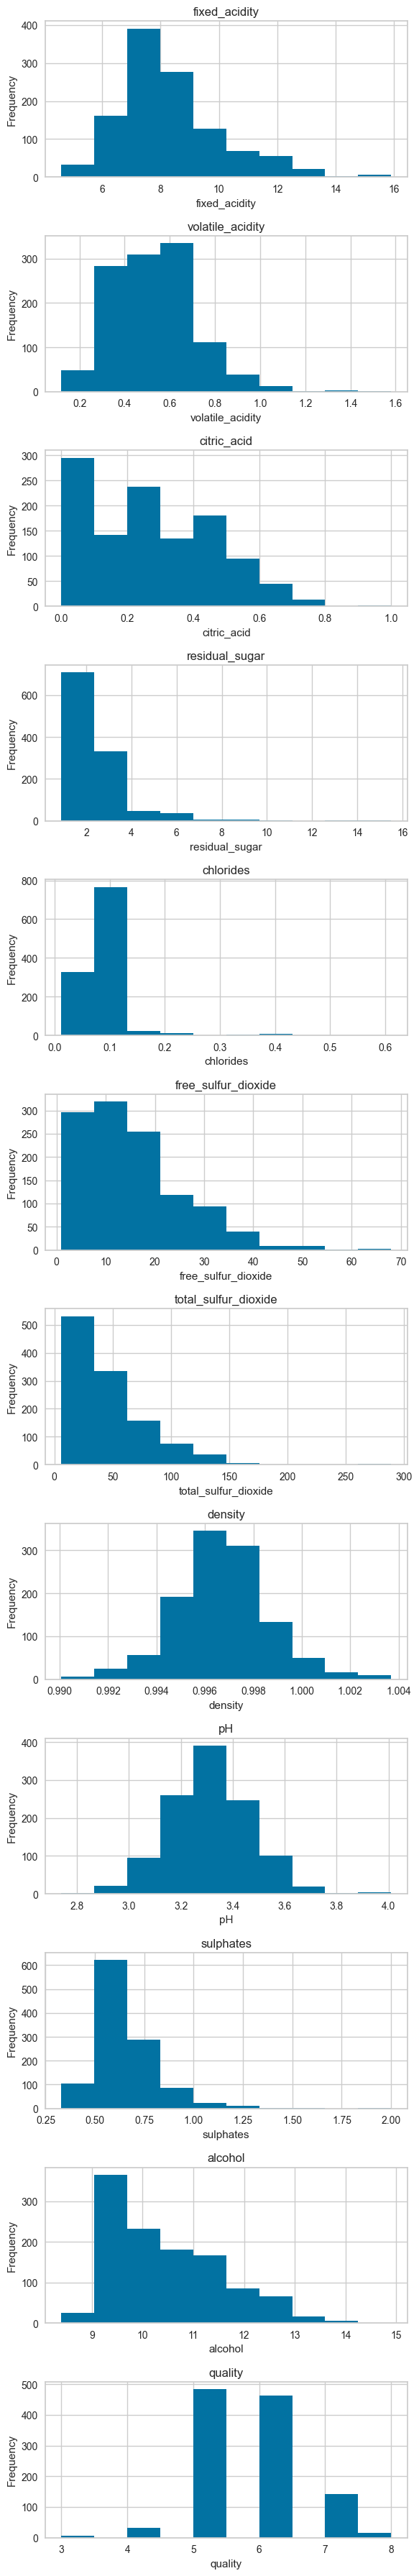

In [223]:
#creating histogram of all columns 

columns = df.columns

def create_histograms(data):

    num_columns = len(data.columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(6, 3 * num_columns))
    
    for i, column in enumerate(data.columns):
        ax = axes[i]
        data[column].plot(kind='hist', ax=ax, title=column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

create_histograms(df)

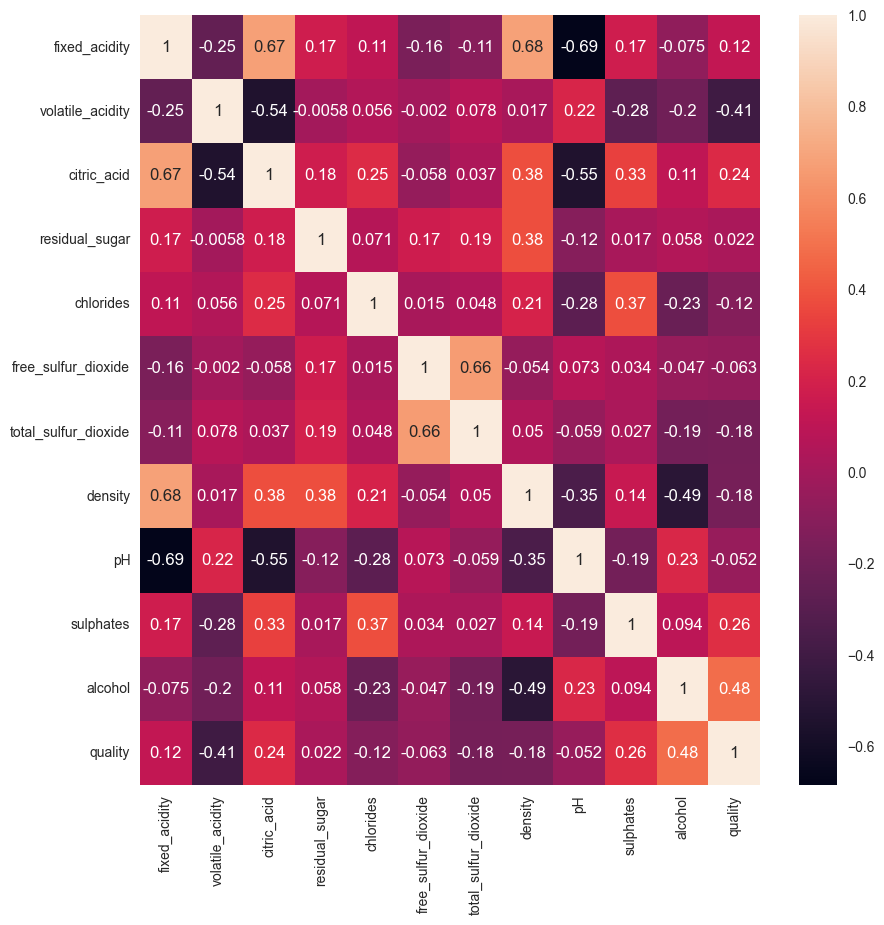

In [224]:

# checking correlation using heatmap 
#plotting the heatmap for correlation

f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)

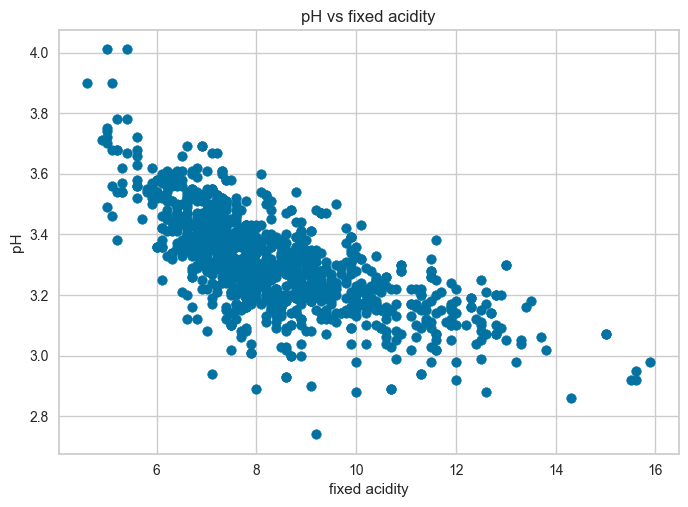

In [225]:
#closer examination of highly correlated characteristics 

x = df.fixed_acidity
y = df.pH
plt.title('pH vs fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('pH')

plt.scatter(x,y)
plt.show()

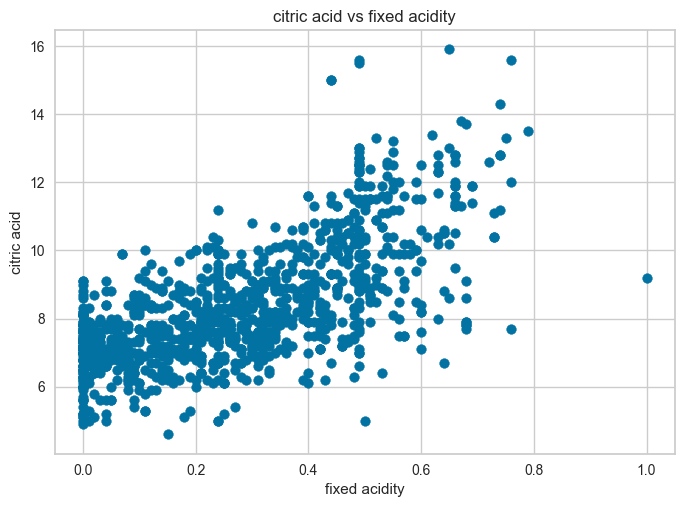

In [226]:
#closer examination of highly correlated characteristics 

x = df.citric_acid
y = df.fixed_acidity
plt.title('citric acid vs fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')

plt.scatter(x,y)
plt.show()

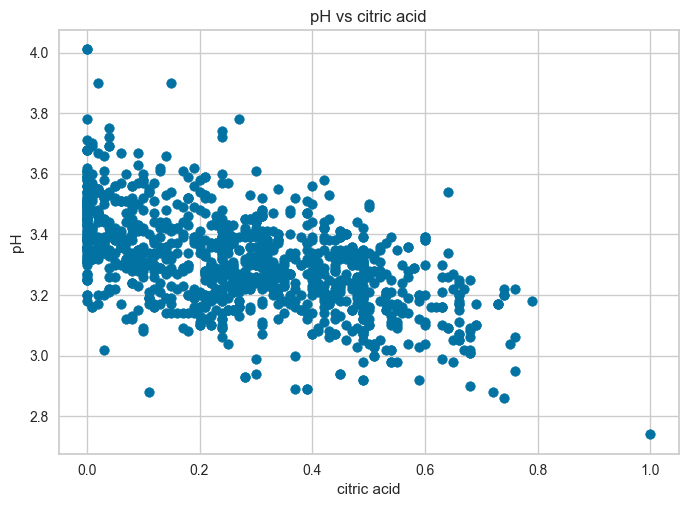

In [227]:
#closer examination of highly correlated characteristics 

x = df.citric_acid
y = df.pH
plt.title('pH vs citric acid')
plt.xlabel('citric acid')
plt.ylabel('pH')

plt.scatter(x,y)
plt.show()

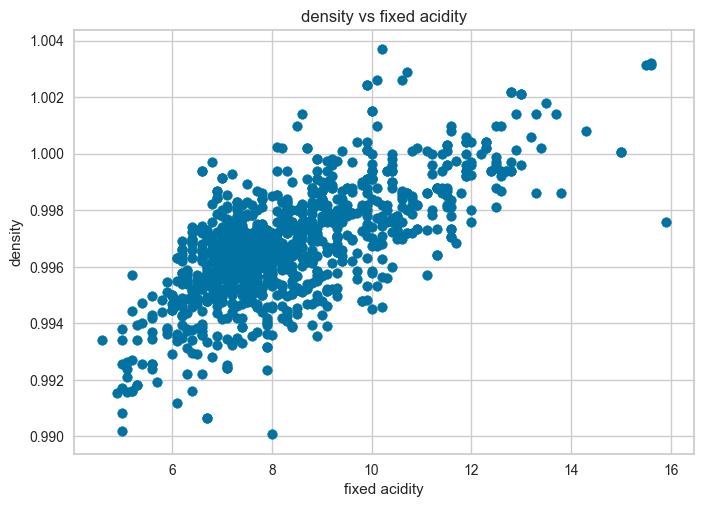

In [228]:
#closer examination of highly correlated characteristics 

x = df.fixed_acidity
y = df.density
plt.title('density vs fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('density')

plt.scatter(x,y)

In [229]:
#preparing data for k-means 
#standardizing data

df_new = pd.DataFrame(df)

# initialize the StandardScaler
scaler = MinMaxScaler((0,1))

# fit and transform the DataFrame
scaled_array = scaler.fit_transform(df_new)

# convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [230]:
#continuing kmeans 

kmeans = KMeans(n_clusters=4, random_state=11).fit(scaled_df)


In [231]:
kmeans.get_params()


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 11,
 'tol': 0.0001,
 'verbose': 0}

In [232]:
kmeans.cluster_centers_


array([[0.24429336, 0.21766418, 0.26660944, 0.09806573, 0.09627634,
        0.22852476, 0.11158798, 0.33093217, 0.50714744, 0.21479787,
        0.527908  , 0.67811159],
       [0.32325786, 0.28264544, 0.30385281, 0.14558501, 0.12760806,
        0.38844737, 0.29188656, 0.54273382, 0.42645806, 0.18669155,
        0.20699301, 0.45887446],
       [0.53936098, 0.20228861, 0.51196787, 0.13008197, 0.1599654 ,
        0.14152131, 0.08762967, 0.61383861, 0.33696993, 0.2508958 ,
        0.32738132, 0.58313253],
       [0.25462029, 0.36197834, 0.10918605, 0.09048264, 0.11917149,
        0.16539396, 0.10689457, 0.47353925, 0.49611793, 0.1596435 ,
        0.24828265, 0.46093023]])

In [233]:
kmeans.inertia_


156.58849528293587

In [234]:
ssd = [] # sum of squared error
K = range(1,10) # Number of clustering

for k in K:
    kmeans = KMeans(n_clusters=k).fit(scaled_df)
    ssd.append(kmeans.inertia_)

ssd

[261.1952743744722,
 201.4801703526781,
 177.71690998718157,
 156.58849528293587,
 142.3199359115224,
 139.59472915967564,
 130.25142040965443,
 128.10119190835087,
 117.24125615125848]

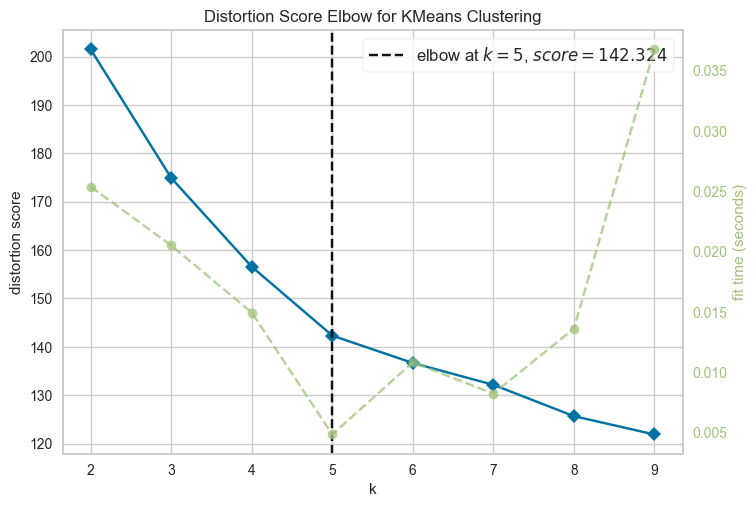

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:
#finding optimal number of clusters

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k = (2, 10))
elbow.fit(scaled_df)
elbow.show()

In [236]:
elbow.elbow_value_


5

In [237]:
kmeans_final = KMeans(n_clusters=elbow.elbow_value_, random_state=11).fit(scaled_df)
clusters_kmeans = kmeans_final.labels_


In [238]:
#adding cluster value to dataset

df["clusters"] = kmeans_final.labels_ + 1
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,4
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [239]:
#means of each column according to cluster

df_means = df.groupby("clusters").agg("mean")
df_means

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
clusters,,,,,,,,,,,,
1,6.547531,0.587068,0.088519,2.264815,0.068562,19.317901,42.617284,0.994393,3.478395,0.634074,11.649588,6.037037
2,8.208219,0.527785,0.302283,2.997260,0.088635,27.652968,90.157534,0.997414,3.283699,0.640548,9.781735,5.296804
3,11.065789,0.433237,0.528474,2.899474,0.117484,11.300000,33.926316,0.998962,3.147947,0.745737,10.259825,5.731579
4,7.601305,0.644661,0.122037,2.217624,0.084953,11.169713,36.621410,0.996733,3.352219,0.596084,9.851001,5.250653
5,8.611111,0.356667,0.418254,2.490476,0.074005,11.841270,28.359788,0.995693,3.279630,0.734233,11.553439,6.497354


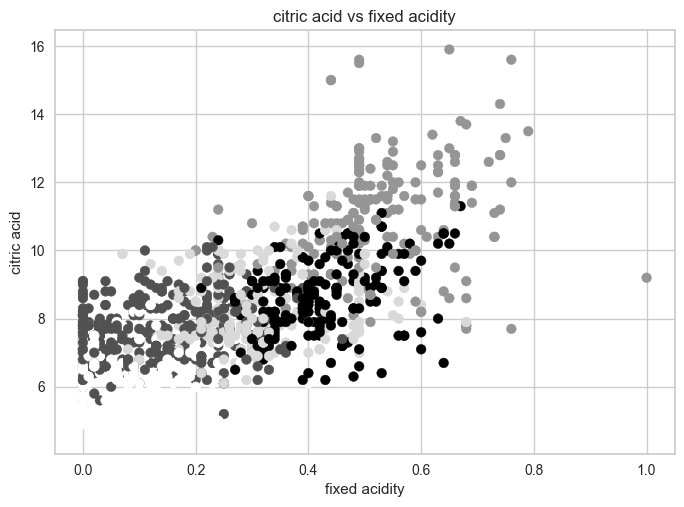

In [240]:
#scatter plot of highly correlated characteristics with cluster color 

x = df.citric_acid
y = df.fixed_acidity
plt.title('citric acid vs fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')

colors = df.clusters
plt.scatter(x,y, c=colors)
plt.show()

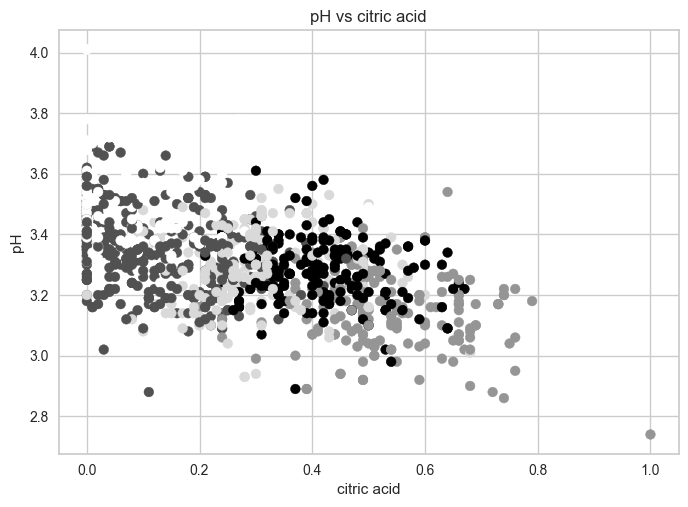

In [241]:
#scatter plot of highly correlated characteristics with cluster color 

x = df.citric_acid
y = df.pH
plt.title('pH vs citric acid')
plt.xlabel('citric acid')
plt.ylabel('pH')
colors = df.clusters


plt.scatter(x,y, c=colors)
plt.show()

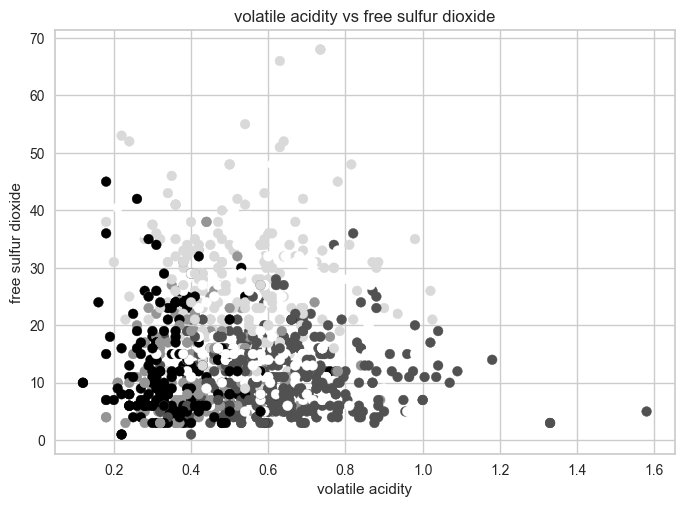

In [242]:
#scatter plot of highly correlated characteristics with cluster color 

x = df.volatile_acidity
y = df.free_sulfur_dioxide
plt.title('volatile acidity vs free sulfur dioxide')
plt.xlabel('volatile acidity')
plt.ylabel('free sulfur dioxide')
colors = df.clusters


plt.scatter(x,y, c=colors)
plt.show()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
clusters,,,,,,,,,,,,
1,6.547531,0.587068,0.088519,2.264815,0.068562,19.317901,42.617284,0.994393,3.478395,0.634074,11.649588,6.037037
2,8.208219,0.527785,0.302283,2.997260,0.088635,27.652968,90.157534,0.997414,3.283699,0.640548,9.781735,5.296804
3,11.065789,0.433237,0.528474,2.899474,0.117484,11.300000,33.926316,0.998962,3.147947,0.745737,10.259825,5.731579
4,7.601305,0.644661,0.122037,2.217624,0.084953,11.169713,36.621410,0.996733,3.352219,0.596084,9.851001,5.250653
5,8.611111,0.356667,0.418254,2.490476,0.074005,11.841270,28.359788,0.995693,3.279630,0.734233,11.553439,6.497354


In [247]:
#adding cluster label to means df

scaled_df["clusters"] = kmeans_final.labels_ + 1
scaled_df_means = scaled_df.groupby("clusters").agg("mean")
scaled_df_means


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
clusters,,,,,,,,,,,,
1,0.172348,0.319910,0.088519,0.093480,0.094427,0.273402,0.129390,0.317421,0.581413,0.182080,0.499937,0.607407
2,0.319311,0.279305,0.302283,0.143648,0.127938,0.397805,0.297376,0.539195,0.428109,0.185957,0.212575,0.459361
3,0.572194,0.214546,0.528474,0.136950,0.176101,0.153731,0.098680,0.652863,0.321218,0.248944,0.286127,0.546316
4,0.265602,0.359357,0.122037,0.090248,0.121791,0.151787,0.108203,0.489215,0.482062,0.159331,0.223231,0.450131
5,0.354966,0.162100,0.418254,0.108937,0.103515,0.161810,0.079010,0.412842,0.424905,0.242056,0.485144,0.699471


In [245]:
#adding cluster label to means df

scaled_df_means['cluster'] = [1,2,3,4,5]
scaled_df_means

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
clusters,,,,,,,,,,,,,
1,0.172348,0.319910,0.088519,0.093480,0.094427,0.273402,0.129390,0.317421,0.581413,0.182080,0.499937,0.607407,1
2,0.319311,0.279305,0.302283,0.143648,0.127938,0.397805,0.297376,0.539195,0.428109,0.185957,0.212575,0.459361,2
3,0.572194,0.214546,0.528474,0.136950,0.176101,0.153731,0.098680,0.652863,0.321218,0.248944,0.286127,0.546316,3
4,0.265602,0.359357,0.122037,0.090248,0.121791,0.151787,0.108203,0.489215,0.482062,0.159331,0.223231,0.450131,4
5,0.354966,0.162100,0.418254,0.108937,0.103515,0.161810,0.079010,0.412842,0.424905,0.242056,0.485144,0.699471,5


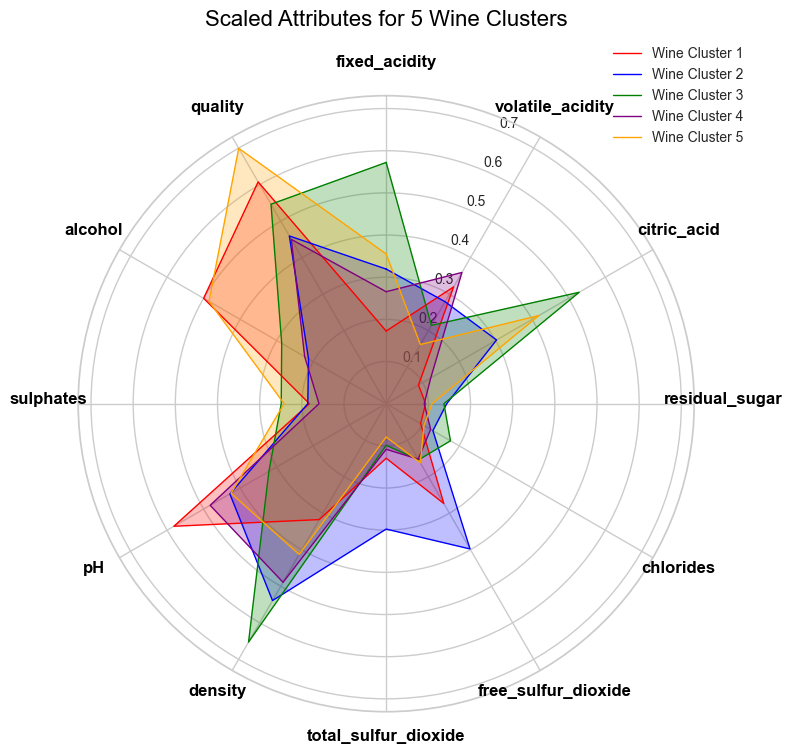

In [252]:
#create radar chart 

data = scaled_df_means

#define labels 
labels = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
          'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
          'pH', 'sulphates', 'alcohol', 'quality']

# number of variables we're plotting
num_vars = len(labels)

# split the circle into even parts and save the angles so we know where to put each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

#plot each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']
for idx, color in enumerate(colors):
    values = scaled_df_means.iloc[idx].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, linestyle='solid', label=f'Wine Cluster {idx+1}')
    ax.fill(angles, values, color=color, alpha=0.25)

#fix axis to go in the right order and start at 12oclock 
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

#hide the degree labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])

#add labels for each axis 
for angle, label in zip(angles[:-1], labels):
    ax.text(angle, .8, label, horizontalalignment='center', size=12, color='black', weight='bold')

#title
ax.set_title('Scaled Attributes for 5 Wine Clusters', size=16, color='black', y=1.1)

#legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


plt.show()